### QED-C Application-Oriented Benchmarks - Hamiltonian Simulation with HamLib - Observables

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.

This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian, and plots the expectation value and execution time over the number of qubits in the problem.


In [ ]:
%reload_ext autoreload
%autoreload 2

### Application and Execution Settings
Configure and run the cell below with the desired execution settings. Then configure and run the remaining cell(s), each one a variation of this benchmark.

In [ ]:
# Benchmark application settings
app_args = dict(
    min_qubits = 4,
    max_qubits = 10,
    skip_qubits = 1,
    max_circuits = 1,
    
    # total shots allocation, by default evenly divided among all executions at one qubit size
    num_shots = 10000,

    # this notebook executes observable benchmarks
    method = 4,
    do_observables = True,
    
    # execute by distributing num_shots weighted by term coefficients
    distribute_shots = True,
    
    # number of Trotter steps and total evolution time
    K = 1,
    t = 0.1,
    
    # initial state can be "checkerboard", "ghz", or "random"
    init_state = "checkerboard",
    
    # method to generate commuting groups and compute observable values
    # Can be:  None, "simple", "1", "2", "N", "estimator"
    group_method = "simple",   
    
    # which API to use for execution, "qiskit" or "cudaq"
    api = "qiskit",
)

# Default execution settings
exec_args = dict(
    hub="", group="", project="",
    provider_backend = None,
    
    backend_id="qasm_simulator",
    #backend_id="statevector_simulator",

    exec_options = {},
)

### Quantum Backend Specific Options
To use a specific hardware backend, uncomment the selected lines below.

In [3]:
# to override for specific backend, uncomment selected lines below

# # ==========================
# # *** If using IBM Quantum hardware, run this once to authenticate
# from qiskit_ibm_runtime import QiskitRuntimeService
# QiskitRuntimeService.save_account('YOUR_API_TOKEN_HERE')

# # *** If you use `ibm_quantum` channel, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** If you use `ibm_cloud` channel, set hub, group, and project name here
# hub=""; group=""; project="Cloud Resource Name (CRN) or service name"

# # *** This example shows how to specify an IBM Quantum backend using a known "backend_id"
# #     See the App-Oriented Benchmarks setup page documentation for more info ob backends and options. 
# exec_args.update(dict(
#     backend_id = "ibmq_qasm_simulator",
#     exec_options = {
#         "use_ibm_quantum_platform": False,
#         "use_sessions": False,
#     }
# ))


### Imports for Debugging Options
These may be removed later, but during development they are convenient.

In [4]:
# Configure benchmark library modules  (for debugging)
import sys
sys.path.insert(1, "../_common")
sys.path.insert(1, "../_common/qiskit")

import execute
execute.verbose = False
execute.verbose_time = False

# Configure paths for hamlib benchmark modules
sys.path.insert(1, "_common")
sys.path.insert(1, "qiskit")

# ... access to HamLib datasets
import hamlib_utils
hamlib_utils.verbose = False

# ... for api-specific kernel functions (circuits)
import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False

# ... for high-level HamLib simulation benchmark loop
import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False

# option to save each Hamiltonian dataset to json file
hamlib_simulation_benchmark.save_dataset_file = False

##### These lines should be near backend lines, but required here for now, after import of execute
# set noise to None to make an ideal shot simulator if using qasm_simulator
#exec_options.update({ "noise_model": None })
execute.noise = None

# uncomment the data_suffix to place noisy data into different directory under _data
#hamlib_simulation_benchmark.data_suffix = ".noisy"


### Hamiltonian Simulation - Transverse Field Ising Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 28, 2025 15:22:54 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 8
... distributing shots, total shots = 10000 shots
num shot list: [3334, 6666]
bucket kmeans: [[6666], [3334]]
  ... num_shots_list = [3334, 6666]
... number of circuits executed = 2
... quantum execution time = 0.056
... exact computation time = 0.015 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -3.3707
    ==> Simulation Quality: 0.843

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... number of terms in Hamiltonian = 10
... distributing shots, total shots = 10000 shots
num shot list: [3334, 6666]
bucket kmeans: [[3334], [6666]]
  ... num_shots_list = [3334, 6666]
... number of circuits executed = 

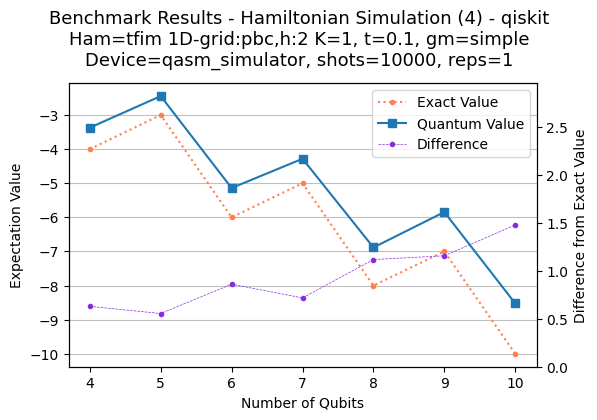

----- Expectation Time Plot -----


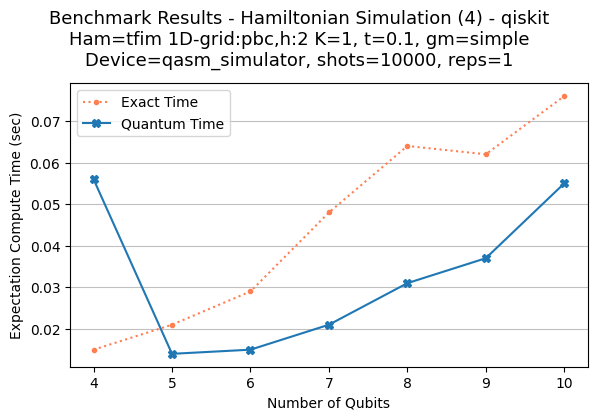

In [5]:
# Transverse Field Ising Model - 1D grid pbc h=2
hamiltonian_name = 'condensedmatter/tfim/tfim'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(
            hamiltonian=hamiltonian_name, hamiltonian_params=hamiltonian_params,
            **app_args, **exec_args)


### Hamiltonian Simulation - Heisenberg Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 28, 2025 15:23:07 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-nonpbc-qubitnodes_Lx-4_h-1
... number of terms in Hamiltonian = 13
... distributing shots, total shots = 10000 shots
num shot list: [3334, 3333, 3333]
bucket kmeans: [[3333, 3333], [3334]]
  ... num_shots_list = [3334, 3333, 3333]
... number of circuits executed = 3
... quantum execution time = 0.055
... exact computation time = 0.022 sec

    Exact expectation value, computed classically: -3.0
    Estimated expectation value, from quantum algorithm: -3.02
    ==> Simulation Quality: 1.007

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-nonpbc-qubitnodes_Lx-5_h-1
... number of terms in Hamiltonian = 17
... distributing shots, total shots = 10000 shots
num shot list: [3334, 3333, 3333]
bucket kmeans: [[3333, 3333], [3334]]
  ... num_shots_list = [3334, 3333,

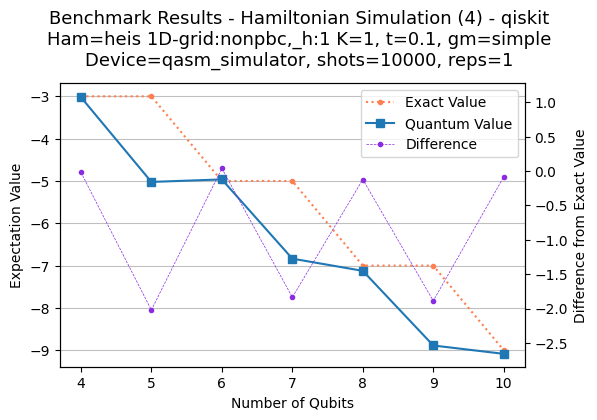

----- Expectation Time Plot -----


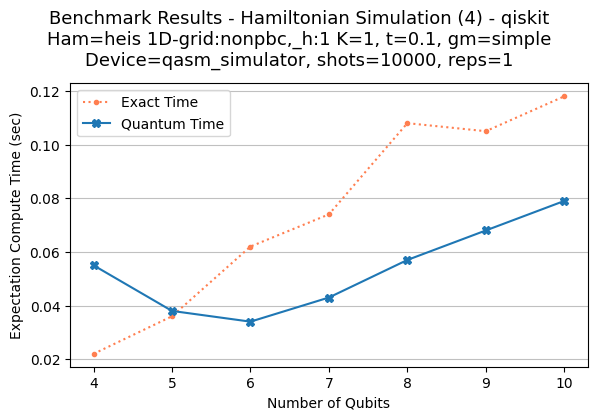

In [6]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/heisenberg/heis'
hamiltonian_params = { "1D-grid": "nonpbc", "_h": 1 }

hamlib_simulation_benchmark.run(
            hamiltonian=hamiltonian_name, hamiltonian_params=hamiltonian_params,
            **app_args, **exec_args)


### Hamiltonian Simulation - Fermi-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 28, 2025 15:23:11 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-2_U-12_enc-bk
... number of terms in Hamiltonian = 11
... distributing shots, total shots = 10000 shots
num shot list: [6667, 3333]
bucket kmeans: [[6667], [3333]]
  ... num_shots_list = [6667, 3333]
... number of circuits executed = 2
... quantum execution time = 0.015
... exact computation time = 0.02 sec

    Exact expectation value, computed classically: -0.0
    Estimated expectation value, from quantum algorithm: -0.0001
    ==> Simulation Quality: 0.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-3_U-12_enc-bk
... number of terms in Hamiltonian = 22
... distributing shots, total shots = 10000 shots
num shot list: [6668, 370, 370, 370, 2222, 0, 0]
bucket kmeans: [[6668], [2222], [370, 370, 370]]
  ... num_sh

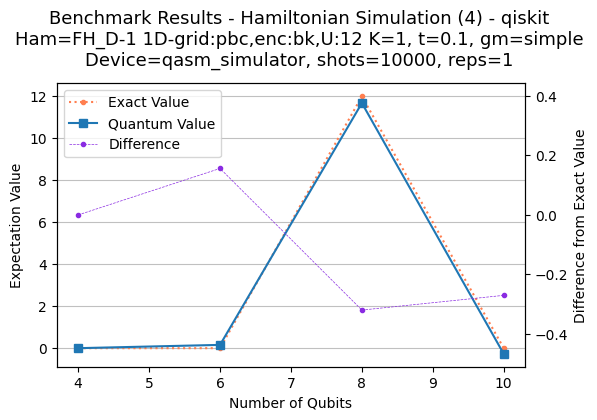

----- Expectation Time Plot -----


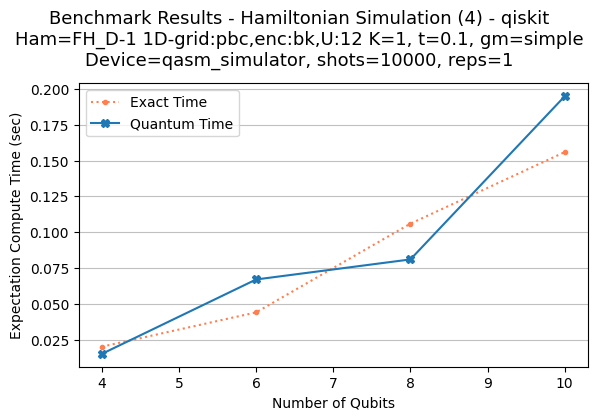

In [7]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/fermihubbard/FH_D-1'
hamiltonian_params = { "1D-grid": "pbc", "enc": "bk", "U":12 }

hamlib_simulation_benchmark.run(
            hamiltonian=hamiltonian_name, hamiltonian_params=hamiltonian_params,
            **app_args, **exec_args)


### Hamiltonian Simulation - Bose-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 28, 2025 15:23:22 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-10_enc-gray_d-4
... number of terms in Hamiltonian = 39
... distributing shots, total shots = 10000 shots
num shot list: [6175, 1543, 287, 149, 1543, 77, 149, 77, 0]
bucket kmeans: [[6175], [287, 149, 77, 149, 77], [1543, 1543]]
  ... num_shots_list = [6175, 1543, 287, 149, 1543, 77, 149, 77, 0]
... number of circuits executed = 9
... quantum execution time = 0.134
... exact computation time = 0.052 sec

    Exact expectation value, computed classically: 60.0
    Estimated expectation value, from quantum algorithm: 49.9685
    ==> Simulation Quality: 0.833

************
Executing [1] circuits with num_qubits = 6
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-3_U-10_enc-gray_d-4
... number of terms in Hamiltonian = 74
... distributing shots, total shots = 10000 

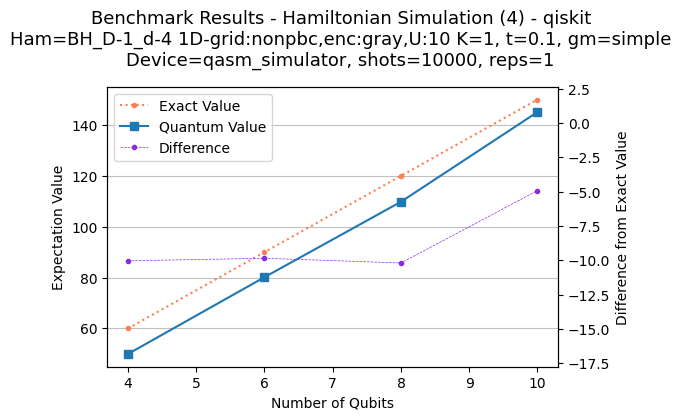

----- Expectation Time Plot -----


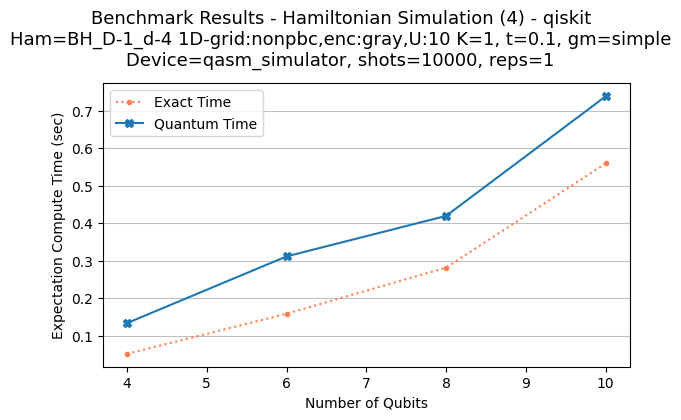

In [8]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/bosehubbard/BH_D-1_d-4'
hamiltonian_params = { "1D-grid": "nonpbc", "enc": "gray", "U":10 }

hamlib_simulation_benchmark.run(
            hamiltonian=hamiltonian_name, hamiltonian_params=hamiltonian_params,
            **app_args, **exec_args)


### Hamiltonian Simulation - Random Max3Sat


In [9]:
# Max3Sat - ratio 2 rinst 02
hamiltonian_name = 'binaryoptimization/max3sat/random/random_max3sat-hams'
hamiltonian_params = { "ratio": "2", "rinst": "02" }

hamlib_simulation_benchmark.run(
            hamiltonian=hamiltonian_name, hamiltonian_params=hamiltonian_params,
            **app_args, **exec_args)


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 28, 2025 15:23:29 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = max3sat_n-4_ratio-2_rinst-02
... number of terms in Hamiltonian = 12
... distributing shots, total shots = 10000 shots
num shot list: [10000]
bucket kmeans: [[10000]]
  ... num_shots_list = [10000]


AttributeError: 'list' object has no attribute 'get_counts'

### Hamiltonian Simulation - H2


In [ ]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/H2'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(
            hamiltonian=hamiltonian_name, hamiltonian_params=hamiltonian_params,
            **app_args, **exec_args)


### Combined Benchmark Results

In [ ]:
import qiskit
print(qiskit.__version__)